# Supervised Learning 
This notebook aims to help get a better understanding of supervised learning by using a 1D Linear Regression model to map an array of inputs to an array of outputs and calculating the loss function to adjust the parameters of the 1D linear regression model to fit the data better.

## Definition of Supervised Learning
**Supervised learning** is a type of machine learning model that learns to map inputs to putputs

### Imports 
Import the libraries needed to define the 1D linear regression model, plot it, and compute the loss function of the model

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 

### Define Input and Output Data 
Define the input data (x) as an array of numbers and define the output data (y) as another array of numbers

In [10]:
x = np.array([0.03, 0.19, 0.34, 0.46, 0.78, 0.81, 1.08, 1.18, 1.39, 1.60, 1.65, 1.90])
y = np.array([0.67, 0.85, 1.05, 1.0, 1.40, 1.5, 1.3, 1.54, 1.55, 1.68, 1.73, 1.6 ])

print(x)
print(y) 

[0.03 0.19 0.34 0.46 0.78 0.81 1.08 1.18 1.39 1.6  1.65 1.9 ]
[0.67 0.85 1.05 1.   1.4  1.5  1.3  1.54 1.55 1.68 1.73 1.6 ]


### Define the 1D Linear Regression Model 
Define the 1D linear regression model as a function of x, phi0, and phi1 where phi0 is the y-intercept and phi1 is the slope.

In [11]:
def f(x, phi0, phi1):
  y = phi0 + phi1*x
  return y

### Define Parameters 
Define the parameters phi0 (y-intercept) and phi1 (slope).

In [12]:
phi0 = 0.4 ; phi1 = 0.2

### Define Graphing Function
Define a graphing function that plots the 1D linear regression model onto a Cartesian coordinate system.

In [13]:
def plot(x, y, phi0, phi1):
    fig, ax = plt.subplots()
    ax.scatter(x,y)
    plt.xlim([0,2.0])
    plt.ylim([0,2.0])
    ax.set_xlabel('Input, x')
    ax.set_ylabel('Output, y')
    # Draw line
    x_line = np.arange(0,2,0.01)
    y_line = f(x_line, phi0, phi1)
    plt.plot(x_line, y_line,'b-',lw=2)
    plt.show()

### Graph the 1D Linear Regression Model 
Plot the 1D Linear Regression model using the input and output data defined previously onto a Cartesian coordinate system.

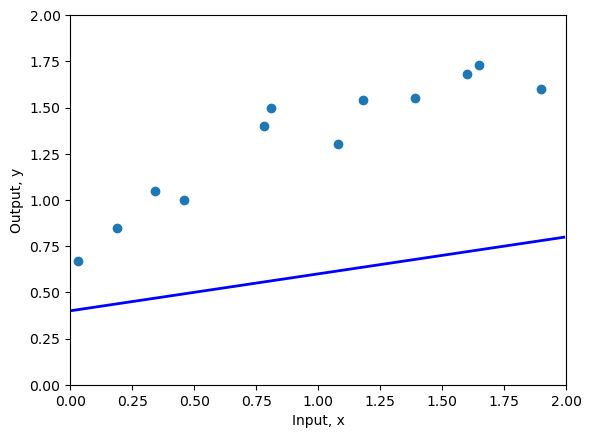

In [14]:
plot(x,y,phi0,phi1)

## Definition of Least Squares Loss Function 
**Least squares loss function** is a function used to calculate the difference between the predicted value and the actual value by finding the summation of the squared differences between the predicted and actual value of a function

### Define the Least Squares Loss Function 
Define the least squares loss function as a function of x, y, phi0, and phi1 where x, phi0, and phi1 are used to calculate the predicted value which is then compared with the actual value

In [15]:
def compute_loss(x,y,phi0,phi1):
   loss = []
   for i in range(0, x.size, 1): 
      loss_value = (phi0 + phi1*x[i] - y[i])**2 
      loss.append(loss_value) 
   loss = sum(loss)
   return loss

### Compute the Least Squares Loss Function 
Compute the least squares loss function to find the loss for the 1D linear regression model and print the loss.

In [16]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =7.07')

Your Loss = 7.07, Ground truth =7.07


## Optimizing the 1D Linear Regression Model 
Attempt to optimize the 1D Linear Regression Model by changing the values of the parameters (phi0 and phi1) and computing the least squares loss function for that set of parameters

### Define a 2nd set of parameters 
Define a second set of parameters (phi0 and phi1) as an attempt to minimize the loss function

In [17]:
phi0 = 1.60 ; phi1 =-0.8

### Graph the 1D Linear Regression Model with 2nd set of parameters 
Graph the 1D Linear Regression model with the 2nd set of parameters onto a Cartesian coordinate system

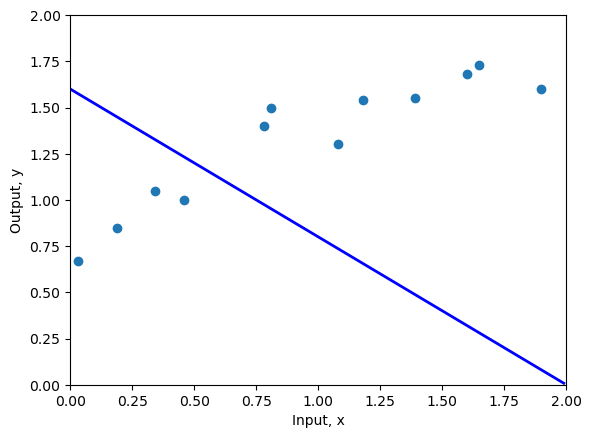

In [18]:
plot(x,y,phi0,phi1)

### Compute the Least Squares Loss Function 
Compute the least squares loss function for the 1D Linear Regression Model with the 2nd set of parameters to observe whether the 1D linear regression model with the 2nd set of parameters fit better with the data or worse with the data.

In [19]:
loss = compute_loss(x,y,phi0,phi1)
print(f'Your Loss = {loss:3.2f}, Ground truth =10.28')

Your Loss = 10.28, Ground truth =10.28


### Define a 3rd set of parameters
Define a thrid set of parameters (phi0 and phi1) as an attempt to minimize the loss function 

In [20]:
phi0 = 0.75 ; phi1 =0.6

### Graph the 1D Linear Regression Model with 3rd set of parameters 
Graph the 1D Linear Regression Model with the 3rd set of parameters onto a Cartesian coordinate system

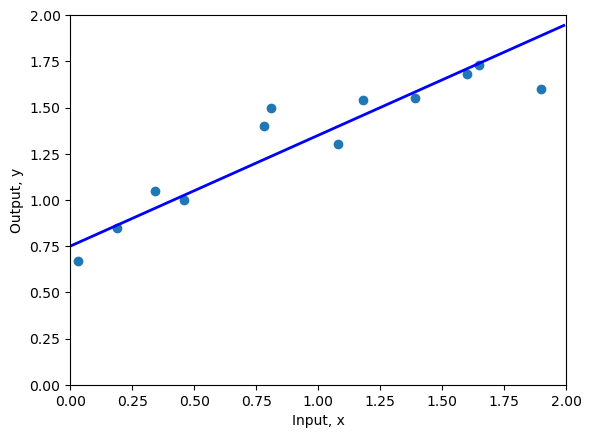

In [21]:
plot(x,y,phi0,phi1)

### Compute the Least Squares Loss Function
Compute the least squares loss function for the 1D Linear Regression Model with the 3rd set of parameters to observe whether the 1D linear regression model with the 3rd set of parameters fit better with the data or worse with the data.

In [22]:
print(f'Your Loss = {compute_loss(x,y,phi0,phi1):3.2f}')

Your Loss = 0.23


### Conclusion 
By calculating the loss functions for each of the three parameters, we can conclude that the third set of parameters best minimized the least squares loss function. From now on, the third parameters will be known as the optimal parameters for the 1D linear regression function.

## Visualizing the Loss Function

### Define Array of Parameters 
Define an array of the two parameters (phi0 and phi1) and combine the two arrays to make a 2D grid of every single possible combination of phi0 and phi1 values.

In [23]:
phi0_mesh, phi1_mesh = np.meshgrid(np.arange(0.0,2.0,0.02), np.arange(-1.0,1.0,0.02))

### Define Array of Loss Values
Define variable all_losses, which is a 2D array with the same structure as the 2D grid of the parameters.

In [24]:
all_losses = np.zeros_like(phi1_mesh)

### Compute Array of Loss Values
Define a loop that calculates the loss function of every single combination of phi0 and phi1 value in the 2D grid and store it as a 2D array in the variable (all_losses)

In [25]:
for indices,temp in np.ndenumerate(phi1_mesh):
    all_losses[indices] = compute_loss(x,y, phi0_mesh[indices], phi1_mesh[indices])

### Plot the Loss Function
Plot the combination of parameters (phi0 and phi1) and its corresponding loss value as a heatmap to visualize the points where the least squares loss function is minimized. In addition, plot the location of the optimal parameters onto the heatmap.

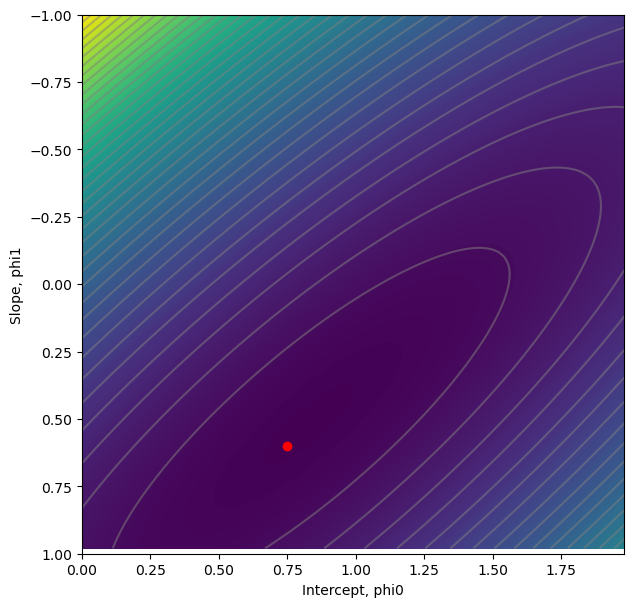

In [28]:
fig = plt.figure()
ax = plt.axes()
fig.set_size_inches(7,7)
levels = 256
ax.contourf(phi0_mesh, phi1_mesh, all_losses ,levels)
levels = 40
ax.contour(phi0_mesh, phi1_mesh, all_losses ,levels, colors=['#80808080'])
ax.set_ylim([1,-1])
ax.set_xlabel(r'Intercept, phi0')
ax.set_ylabel(r'Slope, phi1')
ax.plot(phi0,phi1,'ro')
plt.show()